In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pysimul
from common import *
from math import *

In [ ]:
simul = pysimul.PySimul()
simul['T'] = 1
simul['gamma'] = 10
part_m = 0
simul['x0sigma'] = σ = 0
simul['2D-Rtol'] = Rtol = 0.1

In [ ]:
simul.start()
D = simul['T']/simul['gamma']

In [39]:
simul['n_trajectories']

56317

In [ ]:
simul['pause'] = 1

In [ ]:
path = "2d-free/tol0.1-D0.1"

Survival probability at fixed target position $L$ :

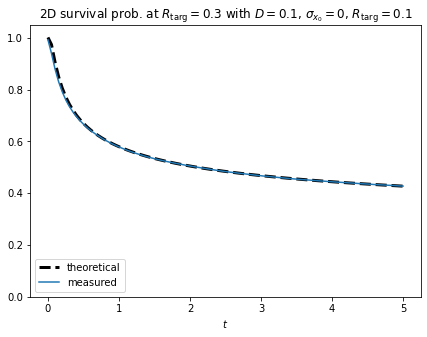

In [40]:
(acc, samples) = simul['survdist_time']
survdist_time = acc/samples*len(acc)
t = np.linspace(0, simul['survdist_max_t'], len(acc))
t[0] = 1e-3

plt.figure(figsize=(7,5))

L_sample = simul['survdist_time_pos']
survdist_th = fpt_2d_free_survival(L_sample, t, D, Rtol, σ, regularize=True, split_domain=True)
plt.plot(t, survdist_th, label=r"theoretical", color='black', linestyle='dashed', lw=3)

plt.plot(t, survdist_time, label=r"measured")

plt.xlabel("$t$")
plt.ylim((0,1.05))
plt.title(r"2D survival prob. at $R_\operatorname{{targ}}={}$ with $D={}$, $\sigma_{{x_0}}={}$, $R_\operatorname{{targ}}={}$".format(L_sample,D,σ,Rtol))
plt.legend(loc='lower left')
plt.savefig(path+"-survival-time.pdf", bbox_inches='tight')

Survival probability at fixed time $t$ :

<ipython-input-34-31df1608bf4c>:12: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  else:            ps0 = lambda a,c: 2*log(1/a) + 2/π * ( sint.quad(f_reg, 0, +np.inf, args=(a,c), epsabs=1e-5, limit=1000)[0] )


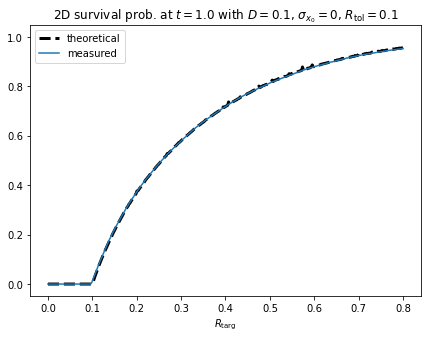

In [41]:
(acc, samples) = simul['survdist_pos']
survdist_pos = acc/samples
L = np.linspace(0, simul['survdist_max_x'], len(acc))
L[0] = 1e-5

plt.figure(figsize=(7,5))

t_sample = simul['survdist_pos_time']
survdist_th = fpt_2d_free_survival(L, t_sample, D, Rtol, σ, regularize=True, split_domain=False)
plt.plot(L, survdist_th, label=r"theoretical", color='black', linestyle='dashed', lw=3)

plt.plot(L, survdist_pos, label=r"measured")

plt.ylim((-0.05, 1.05))
plt.xlabel(r"$R_\operatorname{targ}$")
plt.title(r"2D survival prob. at $t={}$ with $D={}$, $\sigma_{{x_0}}={}$, $R_\operatorname{{tol}}={}$".format(t_sample,D,σ,Rtol))
plt.legend()
plt.savefig(path+"-survival-xtarg.pdf", bbox_inches='tight')

Difference between survival distribution for time and position at the common sampled point :

In [42]:
ix = np.searchsorted(L, L_sample)
it = np.searchsorted(t, t_sample)
print("{:.2f} %".format(100*abs(survdist_pos[ix]-survdist_time[it])/survdist_pos[ix]))

0.54 %


In [ ]:
simul.end()